# 目录
## 1. 导入模块
## 2. 获取加利福尼亚数据
## 3. 自定义层
  - ### 3.1 keras 层查看
  - ### 3.2 自定义有训练参数的keras层
    - `keras.layers.Layer`
  - ### 3.3 自定义无训练参数的keras层（激活层）
    - `keras.layers.Lambda`
  
## 4. 定义模型、训练、测试

## 1. 导入模块

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

from tensorflow import keras
import tensorflow as tf
import sys
import os
import time
import datetime

for module in [np, pd, mpl, sklearn, keras, tf]:
    print(module.__name__, module.__version__)

numpy 1.18.1
pandas 0.25.3
matplotlib 3.1.2
sklearn 0.22.1
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf
tensorflow 2.1.0


## 2. 获取加利福尼亚数据

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state=12234)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=1234)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

print(x_train_scaled.shape, y_train.shape)
print(x_valid_scaled.shape, y_valid.shape)
print(x_test_scaled.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


## 3. 自定义层

  - ### 3.1 keras 层查看

In [4]:
layer = keras.layers.Dense(100, input_shape=[None, 20]) # layer 是一个函数
layer(tf.zeros([5, 20])) # 传入一个值看看

<tf.Tensor: shape=(5, 100), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 

In [5]:
layer.variables  # 所有的参数
layer.trainable_variables # 所有可训练参数

[<tf.Variable 'dense_1/kernel:0' shape=(20, 100) dtype=float32, numpy=
 array([[-0.20056486,  0.16450983,  0.17471766, ..., -0.09687246,
          0.02904657, -0.06408615],
        [ 0.12721169,  0.1590262 ,  0.0637776 , ...,  0.07528108,
         -0.22148156, -0.12243989],
        [ 0.20231915,  0.16149527, -0.04729693, ...,  0.16793716,
         -0.07508501, -0.12188923],
        ...,
        [ 0.1376529 , -0.00220232,  0.07757133, ...,  0.0555982 ,
          0.20280477,  0.10120624],
        [-0.00504193,  0.19379702,  0.22255239, ...,  0.0662415 ,
          0.09546843,  0.16285172],
        [ 0.04698536,  0.19615436,  0.18462095, ..., -0.04966238,
         -0.0005914 , -0.08762927]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(100,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [6]:
help(layer)

Help on Dense in module tensorflow.python.keras.layers.core object:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then
 |  it is flattened prior to the initial dot product with `kernel`.
 |  
 |  Example:
 |  
 |  ```python
 |  # as first layer in a sequential model:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(16,)))
 |  # now the model will take as input arrays of shape (*, 16)
 |  # and output arrays of shape (*, 32)
 |  
 |  # after the first layer, you don't need to specify
 |  # the size

  - ### 3.2 自定义有训练参数的keras层

In [11]:
class CustomizedDenseLayer(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        self.units = units
        self.activation = keras.layers.Activation(activation)
        super(CustomizedDenseLayer, self).__init__(**kwargs)
        
    def build(self, input_shape):
        '''构建所需要的参数'''
        self.kernel = self.add_weight(
            name = "kernel",
            shape = [input_shape[1], self.units],
            initializer = 'uniform',
            trainable = True
        )
        
        self.bias = self.add_weight(
            name = "bias",
            shape = [self.units],
            initializer = "zeros",
            trainable = True
        )
        
        super(CustomizedDenseLayer, self).build(input_shape)
        
    def call(self, x):
        return self.activation(x @ self.kernel + self.bias)
        

  - ### 3.3 自定义无训练参数的keras层（激活层）

In [14]:
customized_softplus = keras.layers.Lambda(lambda x: tf.nn.softplus(x))
customized_softplus([1., 6., 11.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 1.3132616,  6.0024757, 11.000017 ], dtype=float32)>

## 4. 定义模型、训练、测试

In [15]:
model = keras.models.Sequential([
#     CustomizedDenseLayer(100, input_shape=[8], activation="relu"),
#     CustomizedDenseLayer(100, activation="relu"),
#     CustomizedDenseLayer(1)
    CustomizedDenseLayer(100, input_shape=[8]),
    customized_softplus,
    CustomizedDenseLayer(100),
    customized_softplus,
    CustomizedDenseLayer(1)
])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(1e-3), metrics=["mse"])

history = model.fit(x_train_scaled, y_train, validation_data=(x_valid_scaled, y_valid), epochs=100)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 92us/sample - loss: 1.4264 - mse: 1.4264 - val_loss: 1.3240 - val_mse: 1.3240
Epoch 2/100
11610/11610 [==============================] - 1s 68us/sample - loss: 1.3392 - mse: 1.3392 - val_loss: 1.3189 - val_mse: 1.3189
Epoch 3/100
11610/11610 [==============================] - 1s 68us/sample - loss: 1.3379 - mse: 1.3379 - val_loss: 1.3146 - val_mse: 1.3146
Epoch 4/100
11610/11610 [==============================] - 1s 68us/sample - loss: 1.3349 - mse: 1.3349 - val_loss: 1.3135 - val_mse: 1.3135
Epoch 5/100
11610/11610 [==============================] - 1s 67us/sample - loss: 1.3325 - mse: 1.3325 - val_loss: 1.3117 - val_mse: 1.3117
Epoch 6/100
11610/11610 [==============================] - 1s 68us/sample - loss: 1.3283 - mse: 1.3283 - val_loss: 1.3046 - val_mse: 1.3046
Epoch 7/100
11610/11610 [==============================] - 1s 68us/sample - loss: 1.3249 - mse: 1.3249 - val_lo

Epoch 59/100
11610/11610 [==============================] - 1s 68us/sample - loss: 0.5057 - mse: 0.5057 - val_loss: 0.5620 - val_mse: 0.5620
Epoch 60/100
11610/11610 [==============================] - 1s 68us/sample - loss: 0.5034 - mse: 0.5034 - val_loss: 0.5423 - val_mse: 0.5423
Epoch 61/100
11610/11610 [==============================] - 1s 67us/sample - loss: 0.5020 - mse: 0.5020 - val_loss: 0.5522 - val_mse: 0.5522
Epoch 62/100
11610/11610 [==============================] - 1s 67us/sample - loss: 0.5002 - mse: 0.5002 - val_loss: 0.5648 - val_mse: 0.5648
Epoch 63/100
11610/11610 [==============================] - 1s 68us/sample - loss: 0.4990 - mse: 0.4990 - val_loss: 0.5587 - val_mse: 0.5587
Epoch 64/100
11610/11610 [==============================] - 1s 70us/sample - loss: 0.4987 - mse: 0.4987 - val_loss: 0.5582 - val_mse: 0.5582
Epoch 65/100
11610/11610 [==============================] - 1s 69us/sample - loss: 0.4973 - mse: 0.4973 - val_loss: 0.5497 - val_mse: 0.5497
Epoch 66/100


In [9]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

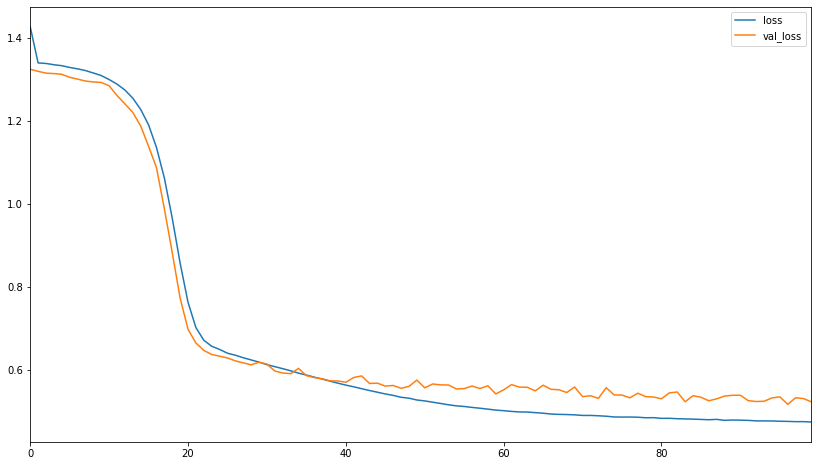

In [16]:
pd.DataFrame(history.history)[["loss", "val_loss"]].plot(figsize=(14, 8))

In [17]:
model.evaluate(x_test_scaled, y_test, batch_size=32)

5160/5160 [==============================] - 0s 40us/sample - loss: 0.4752 - mse: 0.4752


[0.4752360371887222, 0.47523615]